# SVM - Telecommunication Dataset

In [4]:
#A telecommunications provider has segmented its customer base by service usage patterns, 
#categorizing the customers into four groups.
#If demographic data can be used to predict group membership, 
#the company can customize offers for individual prospective customers.
#It is a classification problem.
#The target field, called custcat has four possible values that correspond to the four customer groups, as follows:
#1- Basic Service
#2- E-Service
#3- Plus Service
#4- Total Service

In [18]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:

#Download the csv from the url to C:\
import requests
url=" https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv"
req = requests.get(url)
url_content = req.content
csv_file = open('C:/Users/sures/Desktop/tele_csv.csv', 'wb')
csv_file.write(url_content)
csv_file.close()



In [19]:
#Read the csv from C:\
my_data = pd.read_csv("./tele_csv.csv", delimiter=",")
my_data[0:5]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Firstly, we will load the data and print a sample of the sepal length and width data

In [20]:
my_data['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [21]:
X = my_data[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [22]:
#Standardization of the data points- give data zero mean and unit variance(z=x-Mu)/S where S is SD.
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [23]:
y=my_data['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

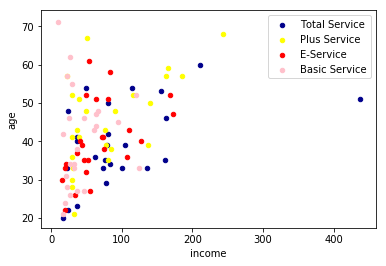

In [24]:
#Scatter plot showing the distribuition of the customer groups across income and age.
ax = my_data[my_data['custcat'] == 4][0:25].plot(kind='scatter', x='income', y='age', color='DarkBlue', label='Total Service');
my_data[my_data['custcat'] == 3][0:25].plot(kind='scatter', x='income', y='age', color='Yellow', label='Plus Service', ax=ax);
my_data[my_data['custcat'] == 2][0:25].plot(kind='scatter', x='income', y='age', color='Red', label='E-Service', ax=ax);
my_data[my_data['custcat'] == 1][0:25].plot(kind='scatter', x='income', y='age', color='Pink', label='Basic Service', ax=ax);
plt.show()

In [9]:
#From the above scatter plot we can see that the income
#is less than 100 K for all the 4 groups and the age is spread across different age groups.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#Split  the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)



In [27]:
#Search best fit parameters for the train data set
from sklearn.model_selection import GridSearchCV
from sklearn import svm


#set up parameters to iterate over
parameters = {'kernel':('linear', 'rbf','sigmoid','poly'),
                'C':[0.0001, 0.001, 0.01, 0.1, 1],
                'gamma':[0.0001, 0.001, 0.01, 0.1, 1]
              }

clf = GridSearchCV(svm.SVC(), parameters)

from sklearn.preprocessing import MultiLabelBinarizer  

clf.fit(X_train, y_train) #iterate over all configurations

print("Best parameters:", clf.best_params_)


Best parameters: {'C': 0.01, 'gamma': 0.0001, 'kernel': 'linear'}


In [28]:
#Build our classifier:

from sklearn.svm import SVC
svm = SVC(C=0.01, kernel='linear', gamma=0.0001)

In [32]:
#Fit to our data:
svm.fit(X_train, y_train)


accuracy = svm.score(X_train, y_train)
print('Model accuracy:',accuracy*100,'%')

Model accuracy: 43.5 %


In [34]:
#Predict using the SVM model on test dataset
yhat = svm.predict(X_test)


In [35]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("SVM accuracy on test data set: ", metrics.accuracy_score(y_test, yhat))

SVM accuracy on test data set:  0.415


<div href="pre-processing">
    <h2>Evaluation metrics</h2>
</div>

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             precision    recall  f1-score   support

          1       0.42      0.55      0.48        51
          2       0.29      0.05      0.08        44
          3       0.41      0.52      0.46        54
          4       0.43      0.49      0.46        51

avg / total       0.39      0.41      0.38       200

Normalized confusion matrix
[[0.55 0.02 0.31 0.12]
 [0.14 0.05 0.39 0.43]
 [0.33 0.   0.52 0.15]
 [0.27 0.08 0.16 0.49]]


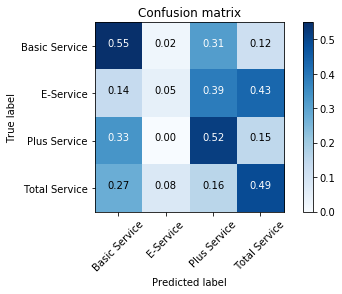

In [174]:
import numpy as np
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2,3,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()     
plot_confusion_matrix(cnf_matrix, classes=['Basic Service','E-Service','Plus Service','Total Service'],normalize= True,  title='Confusion matrix')

In [ ]:
#References
#IBM Developer Skills Network - Labs. (2020). 
#Retrieved 16 April 2020, from https://labs.cognitiveclass.ai/tools/jupyterlab/lab/tree/labs/coursera/ML0101EN/ML0101EN-Clas-SVM-cancer-py-v1.ipynb